# Is Netflix has increasingly focusing on TV rather than movies in recent years?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import re

In [2]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Columns with all unique values don't add any value for our analysis. Therefore, lets drop ```show_id```

In [4]:
netflix_data.drop("show_id", axis=1, inplace=True)
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Univariate 
* Categorical: 
    * [Count plot](https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Continuous:
    * [Histograms](http://seaborn.pydata.org/tutorial/distributions.html#histograms)
    * [Kernel density estimation plot](http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimaton)
    * [Box plots](http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) 

### Bivariate
* Categorical x categorical 
    * [Heat map of contingency table](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) 
    * [Multiple bar plots](http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot#bar-plots) 
* Categorical x continuous 
    * [Box plots](http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) of continuous for each category
    * [Violin plots](http://seaborn.pydata.org/examples/simple_violinplots.html) of continuous distribution for each category
    * Overlaid [histograms](http://seaborn.pydata.org/tutorial/distributions.html#histograms) (if 3 or less categories)
* Continuous x continuous 
    * [Scatter plots](http://seaborn.pydata.org/examples/marginal_ticks.html?highlight=scatter) 
    * [Hexibin plots](http://seaborn.pydata.org/tutorial/distributions.html#hexbin-plots)
    * [Joint kernel density estimation plots](http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation)
    * [Correlation matrix heatmap](http://seaborn.pydata.org/examples/network_correlations.html?highlight=correlation)
    
### Multivariate 
* [Pairwise bivariate figures/ scatter matrix](http://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset)

## Univariate Analysis
### ```type```
- It is categorical data. Hence, bar chart

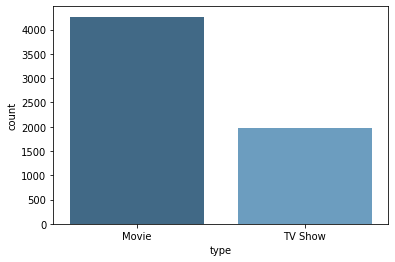

In [5]:
# Vertical bar chart

sns.countplot(x="type", data=netflix_data, palette="Blues_d")

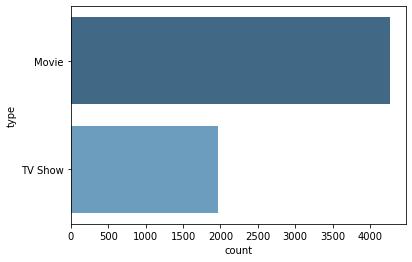

In [6]:
# Horizontal bar chart

sns.countplot(y="type", data=netflix_data, palette="Blues_d")

#### Analysis: 
- The classes are imbalanced. We have more movies almost double than TV shows. So does this mean that Netflis is focusing more on Movies? <br>
- Lets see how many movies and TV shows are published each year -><font color='red'>Do this in Bivariate analysis</font> 
- The next column is ```title```, which all are unique. We can drop this. But let us keep it for visualization purpose

### ```director```
- This is again a categorical data.
- We can observe the following
    - Number of movies/shows released by a director
    - Did a director work on both movies and shows -> <font color='red'>Do this in Bivariate analysis</font>
    - Who are the top 10 directors?

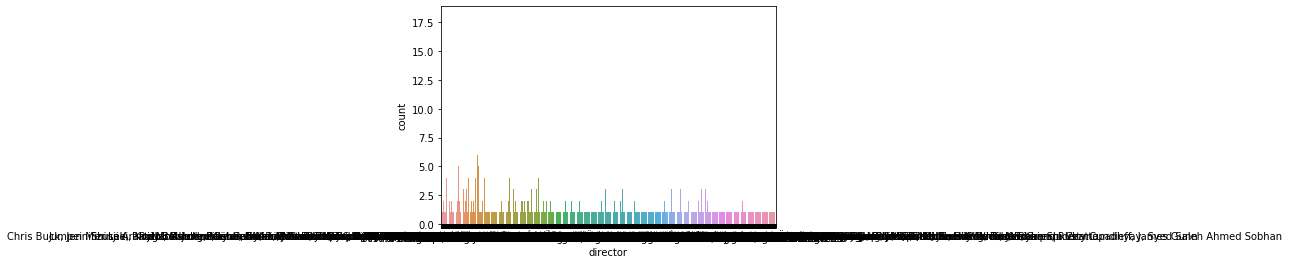

In [7]:
# Number of movies/shows released by a director
sns.countplot(x="director", data= netflix_data)

Most of the directors produce movies less than 5. And we have almost 6000 director. Plotting everyone, doesn't bring any insights.Just see the top 15 or directors - <font color="red">Do this in bivariate analysis</font>

### ```cast```
- It is a categorical data. But, we have multiple categories in each observation

In [8]:
# number of unique actors
netflix_data["cast"] = netflix_data["cast"].str.split(",")
netflix_data["cast"].explode().nunique()

29378

In [9]:
netflix_data["cast"].explode()

0           Alan Marriott
0             Andrew Toth
0            Brian Dobson
0             Cole Howard
0        Jennifer Cameron
              ...        
6233        Courteney Cox
6233          Lisa Kudrow
6233         Matt LeBlanc
6233        Matthew Perry
6233      David Schwimmer
Name: cast, Length: 44881, dtype: object

#### Analysis: Visualizing them again causes a scene like in ```director```. Therefore, we shall gropu them based on ```listed_in```
<font color="red">Do this in Bivariate analysis</font>

### ```country```
- Country is again a list of values, like ```cast```
- Identify which country produced more content
- Which country produced more movies & shows -> <font color="red">Do this in Bivariate analysis</font>

In [10]:
# number of nulls
netflix_data.country.isna().sum()

476

In [11]:
country_data = netflix_data[netflix_data['country'].notna()]
country_data.country.isna().sum()

0

In [12]:
# data["Team"]= data["Team"].str.split("t", n = 1, expand = True)
country_data["country"] = country_data["country"].str.split(",")
country_data.country.explode().nunique()

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


173

We have 173 unique countries. Which country produced more shows?

In [13]:
country_data.country.explode()

0        United States
0                India
0          South Korea
0                China
1       United Kingdom
             ...      
6227         Australia
6229     United States
6230     United States
6232    United Kingdom
6233     United States
Name: country, Length: 7182, dtype: object

In [14]:
country_data.country.explode().value_counts()

United States     2302
India              808
United Kingdom     483
 United States     308
Canada             206
                  ... 
 Sudan               1
 Vatican City        1
 Liechtenstein       1
 Samoa               1
 Romania             1
Name: country, Length: 173, dtype: int64

So, my top 5 contributors are US, India UK,US and Canada.
Notice, that US appeared twice. That is because, there is a space before US in the 2nd occurance

In [15]:
# Remove the spaces
countries = country_data.country.explode()
countries = [country.strip() for country in countries]
counter = collections.Counter(countries)
# print(counter)
print(counter.most_common(5))

[('United States', 2610), ('India', 838), ('United Kingdom', 602), ('Canada', 318), ('France', 271)]


Now the top 5 contributors are US, India UK,US, Canada and France

In [16]:
top_countries = counter.most_common(5)
type(top_countries)

list

In [17]:
# Visualize top countries
top_countries_df = pd.DataFrame(top_countries, columns=['country','count'])
top_countries_df

,country,count
0,United States,2610
1,India,838
2,United Kingdom,602
3,Canada,318
4,France,271


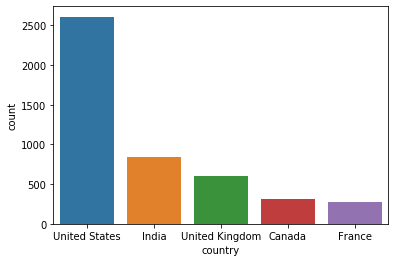

In [18]:
sns.barplot(x="country", y="count", data=top_countries_df)

```date_added```
- Is more content released during the holiday/festive seasons?

In [19]:
# Create a month column
netflix_data["month"] = pd.DatetimeIndex(netflix_data["date_added"]).month_name()
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September
2,TV Show,Transformers Prime,NaN,"[Peter Cullen, Sumalee Montano, Frank Welker...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September
3,TV Show,Transformers: Robots in Disguise,NaN,"[Will Friedle, Darren Criss, Constance Zimme...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September
4,Movie,#realityhigh,Fernando Lebrija,"[Nesta Cooper, Kate Walsh, John Michael Higg...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September


[Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'May'),
 Text(0, 0, 'March'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'December'),
 Text(0, 0, 'August'),
 Text(0, 0, 'April')]

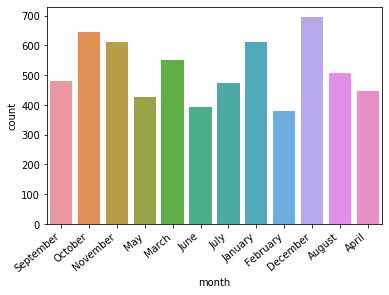

In [20]:
plot = sns.countplot(x="month", data=netflix_data)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40,  ha="right")

We can see that more content is released from October to January    

### ```release_year```

In [23]:
print(netflix_data.release_year.min())
print(netflix_data.release_year.max())

1925
2020


I have data from 1925 to 2020 i.e for 95 years. Do I have data for all the years? 

In [24]:
netflix_data.release_year.nunique()

72

But I have data only for 72 years. 
- Which years data is missing?
- What might be the reason?

In [25]:
type(netflix_data.release_year.sort_values())

pandas.core.series.Series

In [26]:
def find_missing_years(years):
    return [x for x in range(years[0], years[-1]+1) if x not in years]

In [27]:
years = netflix_data.release_year.sort_values().tolist()
missing_years = find_missing_years(years)
missing_years

[1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1957,
 1961]

Are these years missing data in ```release_year``` column or, we don't have data related to these years?

In [28]:
netflix_data[netflix_data["release_year"].isin(missing_years)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month


- So, we don't have data for the period of 1926 to 1961.
- We have data for 59 years. We can group them decade wise
- Check which year has highest content

In [29]:
netflix_data["release_year"][0]

2019

In [30]:
decades = {
    "1960-1970":np.arange(1960, 1970,1),
    "1970-1980":np.arange(1970, 1980, 1),
    "1980-1990":np.arange(1980, 1990, 1),
    "1990-2000":np.arange(1990, 2000, 1),
    "2000-2010":np.arange(2000, 2010, 1),
    "2010-2020":np.arange(2010, 2020, 1)
}
decades

{'1960-1970': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969]),
 '1970-1980': array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]),
 '1980-1990': array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]),
 '1990-2000': array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]),
 '2000-2010': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]),
 '2010-2020': array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])}

In [31]:
netflix_data.release_year[0]

2019

In [32]:
year = 2019
for d,y in decades.items():
    if year in y:
        print(d)

2010-2020


In [33]:
for year in netflix_data.release_year:
    for d,y in decades.items():
        if year in y:
            netflix_data.loc[netflix_data["release_year"] == year, "decade"] = d

In [34]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,decade
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September,2010-2020
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September,2010-2020
2,TV Show,Transformers Prime,NaN,"[Peter Cullen, Sumalee Montano, Frank Welker...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September,2010-2020
3,TV Show,Transformers: Robots in Disguise,NaN,"[Will Friedle, Darren Criss, Constance Zimme...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September,2010-2020
4,Movie,#realityhigh,Fernando Lebrija,"[Nesta Cooper, Kate Walsh, John Michael Higg...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September,2010-2020


In [35]:
netflix_data.decade.unique()

array(['2010-2020', '2000-2010', '1980-1990', '1990-2000', '1970-1980',
       '1960-1970', nan], dtype=object)

[Text(0, 0, '2010-2020'),
 Text(0, 0, '2000-2010'),
 Text(0, 0, '1980-1990'),
 Text(0, 0, '1990-2000'),
 Text(0, 0, '1970-1980'),
 Text(0, 0, '1960-1970')]

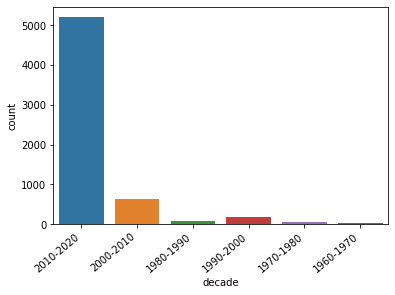

In [36]:
plot = sns.countplot(x="decade", data=netflix_data)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40,  ha="right")

We can clearly see that the more content is produced in the last decade (2010-2020)

In [37]:
# Which year has highest content
year_counter = collections.Counter(netflix_data.release_year)
year_counter.most_common(5)

[(2018, 1063), (2017, 959), (2019, 843), (2016, 830), (2015, 517)]

In [38]:
highest_content_years_df = pd.DataFrame(year_counter.most_common(5), columns=['year','count'])
highest_content_years_df

,year,count
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517


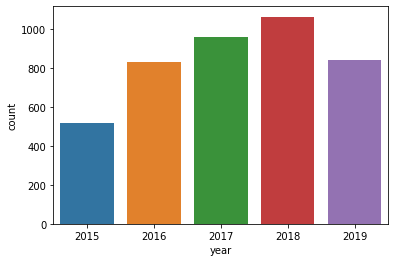

In [39]:
# Visualize the highest years
sns.barplot(x="year", y="count", data=highest_content_years_df)

We have more content generated in 2018

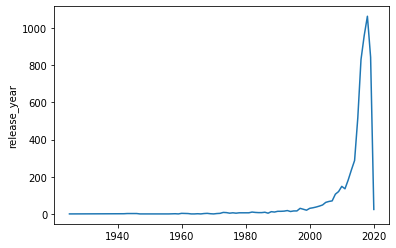

In [40]:
sns.lineplot(x=netflix_data.release_year.value_counts().index, y=netflix_data.release_year.value_counts())

We can see that the increase in data started from 2000 and incresed so rapidly from 2010.

### ```rating``` 
- Categorical variable
- Which categories of data we have more?

In [41]:
netflix_data.rating.nunique()

14

In [42]:
netflix_data.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

[Text(0, 0, 'TV-MA'),
 Text(0, 0, 'TV-14'),
 Text(0, 0, 'TV-PG'),
 Text(0, 0, 'R'),
 Text(0, 0, 'PG-13'),
 Text(0, 0, 'NR'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'TV-Y7'),
 Text(0, 0, 'TV-G'),
 Text(0, 0, 'TV-Y'),
 Text(0, 0, 'TV-Y7-FV'),
 Text(0, 0, 'G'),
 Text(0, 0, 'UR'),
 Text(0, 0, 'NC-17')]

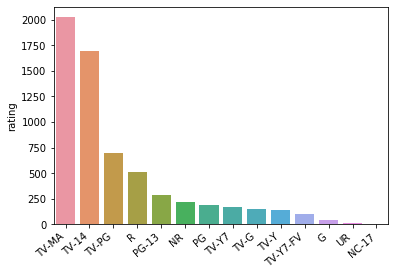

In [43]:
plot = sns.barplot(x=netflix_data.rating.value_counts().index, y=netflix_data.rating.value_counts())
plot.set_xticklabels(plot.get_xticklabels(), rotation=40,  ha="right")

We have more content related to "TV_MA" i.e., content for 18+ audience

### ```duration```
- We know that the movie duration has been reduced over the years. Visualize this change.
- Generally, Indian movies are longer than US,UK movies. -> <font color="red">Do this in Bivariate Analysis</font>


In [44]:
netflix_data.duration.unique

<bound method Series.unique of 0           90 min
1           94 min
2         1 Season
3         1 Season
4           99 min
           ...    
6229    13 Seasons
6230     4 Seasons
6231        60 min
6232     2 Seasons
6233    10 Seasons
Name: duration, Length: 6234, dtype: object>

```duration``` has string values. Some observations(may be for TV shows) have number of seasons rather than the time duration. 
<br><br>
So, visualize the duration for movies & num of season for TV shows during <font color="red">Bivariate analysis</font>

### ```listed_in```
- This is similar to ```country``` where we have list of strings

In [45]:
# Check for nulls
netflix_data.listed_in.isna().sum()

0

In [46]:
netflix_data["listed_in"] = netflix_data["listed_in"].str.split(",")
netflix_data.listed_in.explode().nunique()

72

We have 72 variety of categories

In [47]:
netflix_data.listed_in.explode().unique()

array(['Children & Family Movies', ' Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies', 'Crime TV Shows',
       ' International TV Shows', ' Spanish-Language TV Shows',
       'International Movies', ' Sci-Fi & Fantasy', ' Thrillers',
       'Docuseries', ' Science & Nature TV', 'Action & Adventure',
       ' Dramas', ' International Movies', 'Cult Movies',
       ' Independent Movies', ' Romantic Movies', 'Documentaries',
       'Horror Movies', 'Dramas', 'International TV Shows',
       ' Romantic TV Shows', ' TV Comedies', ' TV Dramas',
       ' TV Thrillers', 'Romantic TV Shows', ' TV Mysteries',
       'TV Comedies', 'British TV Shows', ' Docuseries',
       ' Music & Musicals', ' Reality TV', ' TV Action & Adventure',
       'Anime Features', ' Teen TV Shows', ' Faith & Spirituality',
       ' Horror Movies', 'Independent Movies', ' Korean TV Shows',
       'Reality TV', 'Anime Series', ' Crime TV Shows', ' LGBTQ Movies',
       'TV Horror', ' Cult Movies', 'Movies', "

Notice that there are duplicate categories because of the whitespace characters

In [48]:
# Remove the spaces
categories = netflix_data.listed_in.explode()
categories = [category.strip() for category in categories]
cat_counter = collections.Counter(categories)
# print(counter)
print(cat_counter.most_common(5))

[('International Movies', 1927), ('Dramas', 1623), ('Comedies', 1113), ('International TV Shows', 1001), ('Documentaries', 668)]


In [49]:
len(set(categories))

42

In [50]:
categories_df = pd.DataFrame(cat_counter.most_common(5), columns=['category','count'])
categories_df

,category,count
0,International Movies,1927
1,Dramas,1623
2,Comedies,1113
3,International TV Shows,1001
4,Documentaries,668


[Text(0, 0, 'International Movies'),
 Text(0, 0, 'Dramas'),
 Text(0, 0, 'Comedies'),
 Text(0, 0, 'International TV Shows'),
 Text(0, 0, 'Documentaries')]

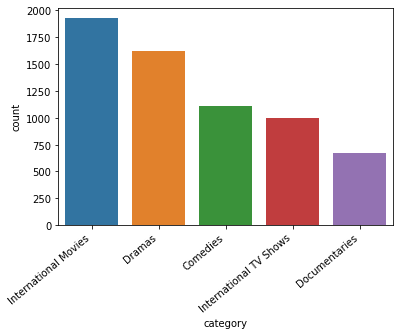

In [51]:
plot = sns.barplot(x="category", y ="count", data=categories_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40,  ha="right")

Now, we have 42 wide range of categories out of which the most common once are
- International Movies
- Dramas
- Comedies
- International TV Shows
- Documentaries

### ```description```

In [52]:
netflix_data.description[0]

'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'

This column is the one liner about the movie/show. Add no much value unless, we go into NLP techniques. So, we can drop this column

In [53]:
netflix_data.drop("description", axis=1, inplace=True)
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,decade
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"[Children & Family Movies, Comedies]",September,2010-2020
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,[Stand-Up Comedy],September,2010-2020
2,TV Show,Transformers Prime,NaN,"[Peter Cullen, Sumalee Montano, Frank Welker...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,[Kids' TV],September,2010-2020
3,TV Show,Transformers: Robots in Disguise,NaN,"[Will Friedle, Darren Criss, Constance Zimme...",United States,"September 8, 2018",2016,TV-Y7,1 Season,[Kids' TV],September,2010-2020
4,Movie,#realityhigh,Fernando Lebrija,"[Nesta Cooper, Kate Walsh, John Michael Higg...",United States,"September 8, 2017",2017,TV-14,99 min,[Comedies],September,2010-2020


## Bivariate Analysis
### How many movies and TV Shows are published in each year
- We need ```type``` and ```year``` variables, where ```type``` is categorical and ```year``` is continous. So, we can try boxplots or violin plots
- X-axis will be the categories and y-axis will be the continous value

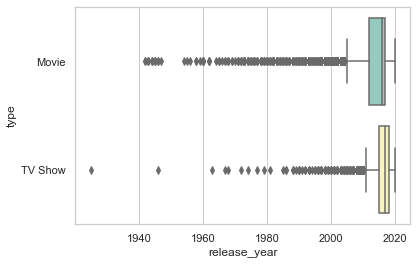

In [54]:
sns.set(style="whitegrid")
sns.boxplot(x="release_year", y="type", data=netflix_data, palette="Set3")

Slice the data for decade 2010-2020

In [55]:
yearly_type_data = netflix_data[netflix_data["decade"] == "2010-2020"]
yearly_type_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,decade
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"[Children & Family Movies, Comedies]",September,2010-2020
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,[Stand-Up Comedy],September,2010-2020
2,TV Show,Transformers Prime,NaN,"[Peter Cullen, Sumalee Montano, Frank Welker...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,[Kids' TV],September,2010-2020
3,TV Show,Transformers: Robots in Disguise,NaN,"[Will Friedle, Darren Criss, Constance Zimme...",United States,"September 8, 2018",2016,TV-Y7,1 Season,[Kids' TV],September,2010-2020
4,Movie,#realityhigh,Fernando Lebrija,"[Nesta Cooper, Kate Walsh, John Michael Higg...",United States,"September 8, 2017",2017,TV-14,99 min,[Comedies],September,2010-2020


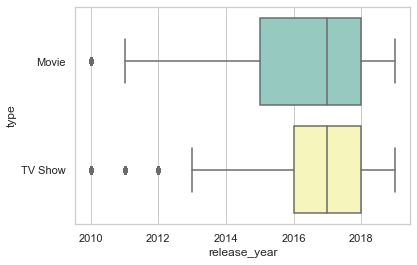

In [57]:
sns.set(style="whitegrid")
sns.boxplot(x="release_year", y="type", data=yearly_type_data, palette="Set3")

#### We see that more movies are produced than the TV shows in the decade 2010 to 2020. 
But each TV show has multiple seasons. Sholud we consider each season equal to one movie? 

In [58]:
for index, (title, content_type, duration) in enumerate(zip(netflix_data.title, netflix_data.type, netflix_data.duration)):
    if content_type=="Movie":
        netflix_data.loc[netflix_data["title"] == title, "multiplier"] = 1
    else:
        num_of_seasons = re.findall(r'\d+',duration)
        netflix_data.loc[netflix_data["title"] == title, "multiplier"] = num_of_seasons

In [59]:
netflix_data.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,decade,multiplier
6229,TV Show,Red vs. Blue,NaN,"[Burnie Burns, Jason Saldaña, Gustavo Sorola...",United States,NaN,2015,NR,13 Seasons,"[TV Action & Adventure, TV Comedies, TV Sci-...",NaN,2010-2020,13
6230,TV Show,Maron,NaN,"[Marc Maron, Judd Hirsch, Josh Brener, Nora...",United States,NaN,2016,TV-MA,4 Seasons,[TV Comedies],NaN,2010-2020,4
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,[Movies],NaN,2010-2020,1
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"[Daniel Radcliffe, Jon Hamm, Adam Godley, C...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"[British TV Shows, TV Comedies, TV Dramas]",NaN,2010-2020,2
6233,TV Show,Friends,NaN,"[Jennifer Aniston, Courteney Cox, Lisa Kudro...",United States,NaN,2003,TV-14,10 Seasons,"[Classic & Cult TV, TV Comedies]",NaN,2000-2010,10


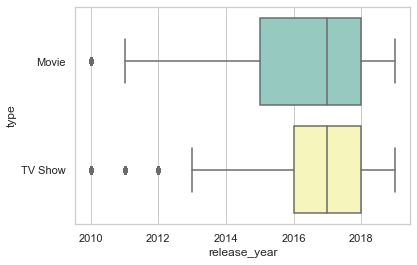

In [60]:
sns.set(style="whitegrid")
sns.boxplot(x="release_year", y="type", data=yearly_type_data, palette="Set3")

In [61]:
netflix_data.multiplier = pd.to_numeric(netflix_data['multiplier'])
sample = netflix_data.groupby(["release_year", "type"]).agg({'multiplier': 'sum'}).reset_index()
sample

,release_year,type,multiplier
0,1925,TV Show,1.0
1,1942,Movie,2.0
2,1943,Movie,3.0
3,1944,Movie,3.0
4,1945,Movie,3.0
...,...,...,...
110,2018,TV Show,759.0
111,2019,Movie,400.0
112,2019,TV Show,818.0
113,2020,Movie,6.0


In [62]:
# test for a random observation if the groupby is correct
sample = sample[sample["release_year"] >= 2010]
sample

,release_year,type,multiplier
93,2010,Movie,111.0
94,2010,TV Show,57.0
95,2011,Movie,100.0
96,2011,TV Show,49.0
97,2012,Movie,125.0
98,2012,TV Show,100.0
99,2013,Movie,177.0
100,2013,TV Show,105.0
101,2014,Movie,213.0
102,2014,TV Show,111.0


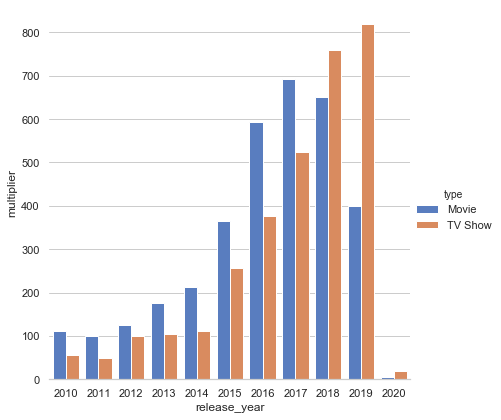

In [63]:
g = sns.catplot(x="release_year", y="multiplier", hue="type", data=sample,
                height=6, kind="bar", palette="muted")
g.despine(left=True)

If we consider, 1 season = 1 movie, then, until 2017 Netflix focus was more on movies. But from 2018, we can say that its focus is more on TV Shows. 

### Indian movies run longer than English ones?
- This is again a categorical (```type```) vs continous(```duration```)
- Since we don't have the time duration for TV shows, we are focusing only on movies

In [80]:
duration = country_data.explode("country")
duration.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",United States,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",India,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",South Korea,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",China,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [81]:
# delete nulls in country
duration = duration[duration["country"].notna()]
duration.country.isna().sum()

0

In [82]:
# Filter out only movies that are released after 2010
duration = duration[(duration["type"] == "Movie") & (duration["release_year"] >= 2010)]
duration.type.unique()

array(['Movie'], dtype=object)

In [83]:
top_countries = ["United States", "India", "United Kingdom", "Canada", "France"]

In [86]:
# Select only top countries
duration = duration.query("country in @top_countries")
duration.country.unique()

array(['United States', 'United Kingdom', 'France', 'India', 'Canada'],
      dtype=object)

In [87]:
duration["duration"].replace({"min": ""}, inplace=True, regex=True)
duration.head()

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",United States,"September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,Movie,#realityhigh,Fernando Lebrija,"[Nesta Cooper, Kate Walsh, John Michael Higg...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
9,Movie,Good People,Henrik Ruben Genz,"[James Franco, Kate Hudson, Tom Wilkinson, ...",United States,"September 8, 2017",2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
19,Movie,Love,Gaspar Noé,"[Karl Glusman, Klara Kristin, Aomi Muyock, ...",France,"September 8, 2017",2015,NR,135,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...


In [88]:
#convert the duration col to int
duration["duration"] = duration["duration"].astype(int)

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
#Get the average duration for each country
duration = duration.groupby('country', as_index=False)['duration'].mean()
duration

,country,duration
0,Canada,89.704918
1,France,94.731183
2,India,121.248162
3,United Kingdom,91.433476
4,United States,86.220379


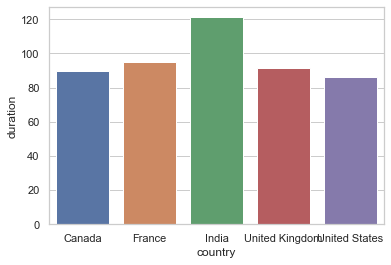

In [90]:
sns.barplot(x="country", y="duration", data=duration)

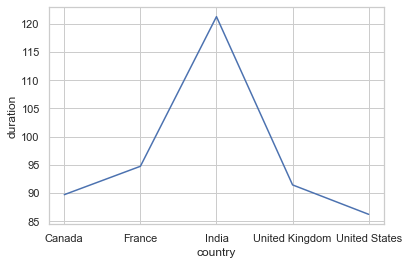

In [91]:
sns.lineplot(x="country", y="duration", data=duration)

Yes, it is true that Indian movies have longer duration. The effect of songs, perhaps!

### Did a adirector work in both movies and TV Shows?
- Both are categorical data

In [92]:
grouped_directors =  netflix_data.groupby(["director","type"]).size().nlargest(15).reset_index()

Lets consider the top 15 directors

In [93]:
grouped_directors

,director,type,0
0,"Raúl Campos, Jan Suter",Movie,18
1,Marcus Raboy,Movie,14
2,Jay Karas,Movie,13
3,Jay Chapman,Movie,12
4,Martin Scorsese,Movie,9
5,Steven Spielberg,Movie,9
6,David Dhawan,Movie,8
7,Johnnie To,Movie,8
8,Lance Bangs,Movie,8
9,Cathy Garcia-Molina,Movie,7


We can see that the top 15 directors worked on Movies alone.

In [94]:
grouped_directors =  netflix_data.groupby(["director","type"]).size().reset_index()
TV_dirs = grouped_directors[grouped_directors["type"]=="TV Show"]
movie_dirs = grouped_directors[grouped_directors["type"]=="Movie"]

In [95]:
pd.merge(TV_dirs, movie_dirs, on='director')

,director,type_x,0_x,type_y,0_y
0,Alessandro Angulo,TV Show,1,Movie,1
1,Anurag Basu,TV Show,1,Movie,3
2,Dan Forrer,TV Show,1,Movie,1
3,Daniel Kontur,TV Show,1,Movie,1
4,David Ayer,TV Show,1,Movie,2
5,Eli Roth,TV Show,1,Movie,1
6,Jay Chandrasekhar,TV Show,1,Movie,1
7,Jerry Seinfeld,TV Show,1,Movie,1
8,Justin Webster,TV Show,1,Movie,1
9,"Kobun Shizuno, Hiroyuki Seshita",TV Show,1,Movie,2


This is the list of people who worked on both TV shows and movies.

## Number of shows & movies each country produced
- Lets consider the top 5 countries: US, India, UK, Canada and France

In [96]:
# Unstack the ```country``` into multiple rows for each country
countries = country_data.explode("country")
countries

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",United States,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",India,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",South Korea,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",China,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
...,...,...,...,...,...,...,...,...,...,...,...
6227,TV Show,The Adventures of Figaro Pho,NaN,"[Luke Jurevicius, Craig Behenna, Charlotte H...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6229,TV Show,Red vs. Blue,NaN,"[Burnie Burns, Jason Saldaña, Gustavo Sorola...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"[Marc Maron, Judd Hirsch, Josh Brener, Nora...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"[Daniel Radcliffe, Jon Hamm, Adam Godley, C...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [97]:
top_countries

['United States', 'India', 'United Kingdom', 'Canada', 'France']

In [98]:
countries = countries.query("country in @top_countries")
countries

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","[Alan Marriott, Andrew Toth, Brian Dobson, ...",United States,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,[Jandino Asporaat],United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"[Peter Cullen, Sumalee Montano, Frank Welker...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"[Will Friedle, Darren Criss, Constance Zimme...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"[Nesta Cooper, Kate Walsh, John Michael Higg...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6226,TV Show,La Familia P. Luche,NaN,"[Eugenio Derbez, Consuelo Duval, Luis Manuel...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6229,TV Show,Red vs. Blue,NaN,"[Burnie Burns, Jason Saldaña, Gustavo Sorola...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"[Marc Maron, Judd Hirsch, Josh Brener, Nora...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"[Daniel Radcliffe, Jon Hamm, Adam Godley, C...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [99]:
countries.country.unique()

array(['United States', 'United Kingdom', 'France', 'India', 'Canada'],
      dtype=object)

In [100]:
countries = countries.groupby(["country", "type"]).size().reset_index()
countries

,country,type,0
0,Canada,Movie,130
1,Canada,TV Show,76
2,France,Movie,97
3,France,TV Show,50
4,India,Movie,753
5,India,TV Show,55
6,United Kingdom,Movie,282
7,United Kingdom,TV Show,201
8,United States,Movie,1682
9,United States,TV Show,620


In [101]:
countries.columns=["country", "type", "count"]
countries

,country,type,count
0,Canada,Movie,130
1,Canada,TV Show,76
2,France,Movie,97
3,France,TV Show,50
4,India,Movie,753
5,India,TV Show,55
6,United Kingdom,Movie,282
7,United Kingdom,TV Show,201
8,United States,Movie,1682
9,United States,TV Show,620


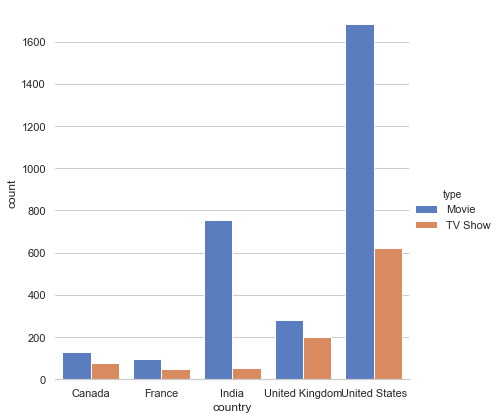

In [102]:
g = sns.catplot(x="country", y="count", hue="type", data=countries,
                height=6, kind="bar", palette="muted")
g.despine(left=True)

# Conclusion:
##### - The top 5 countries that produced more concent are US, India, UK, Canada and France
##### - Most of the content is released during the months of October to January
##### - The netflix content started increasing from 2005 and increased rapidly from 2010, with highest content in 2018 so far. 
##### - The majority of the content is related to "TV-MA" and "TV-14" ratings.
##### - We have most of the content listed in "International Movies", "dramas" and "Comedy"
##### - In the decade 2010-2020, we see that Movies are released more. But, there are multiple seasons in each TV Show. So, if we consider each season equal to a movie, then we see that from 2018, Netflix is more invested in the TV shows rather than movies. 
##### - Indian movies run longer durations compared to other top countries.
##### - There are few directors who worked on both Movies and TV Shows.